In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, precision_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [62]:
data = pd.read_csv(r"/kaggle/input/telecom-customer/Telecom_customer churn.csv")

In [63]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [64]:
data.set_index(keys = 'Customer_ID', inplace = True)
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y

In [65]:
# Missing Data

missed_count = data.isnull().sum().sort_values(ascending=False).head(50)
missingPercnt = (missed_count/len(data))*100

pd.DataFrame({'No. missing values': missed_count, '% of missing data':
              missingPercnt.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


In [66]:
# Delete Columns seems to have less significant contribution 

data.drop(['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 
         'dwlltype','lor','income','adults','prizm_social_one',
         'infobase','crclscod'], axis=1, inplace=True)

**Cleaning Numerical Data**

In [67]:
# Numeric Data
data.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1000001 to 1100000
Data columns (total 74 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-nul

In [68]:
# numeric_cols_to_fill = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
#                         'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

numeric_cols_to_fill = ['avg6mou', 'avg6qty', 'avg6rev', 'change_mou', 'change_rev', 'rev_Mean', 'totmrc_Mean', 'da_Mean',
                        'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'mou_Mean', 'datovr_Mean', 'roam_Mean']

clean_data = data.copy()


for column in numeric_cols_to_fill:
  clean_data[column].fillna(clean_data[column].mean(), inplace = True)

**Cleaning Catagorical Data**

In [69]:
# Catagorical Data
data.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1000001 to 1100000
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   new_cell    100000 non-null  object
 1   asl_flag    100000 non-null  object
 2   area        99960 non-null   object
 3   dualband    99999 non-null   object
 4   refurb_new  99999 non-null   object
 5   hnd_webcap  89811 non-null   object
 6   marital     98268 non-null   object
 7   ethnic      98268 non-null   object
 8   kid0_2      98268 non-null   object
 9   kid3_5      98268 non-null   object
 10  kid6_10     98268 non-null   object
 11  kid11_15    98268 non-null   object
 12  kid16_17    98268 non-null   object
 13  creditcd    98268 non-null   object
dtypes: object(14)
memory usage: 11.4+ MB


In [74]:
categorical_data = ['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
                    'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

In [71]:
#Filling missing Data
clean_data['hnd_webcap']=clean_data['hnd_webcap'].fillna('UNKW')

clean_data.dropna(inplace=True)

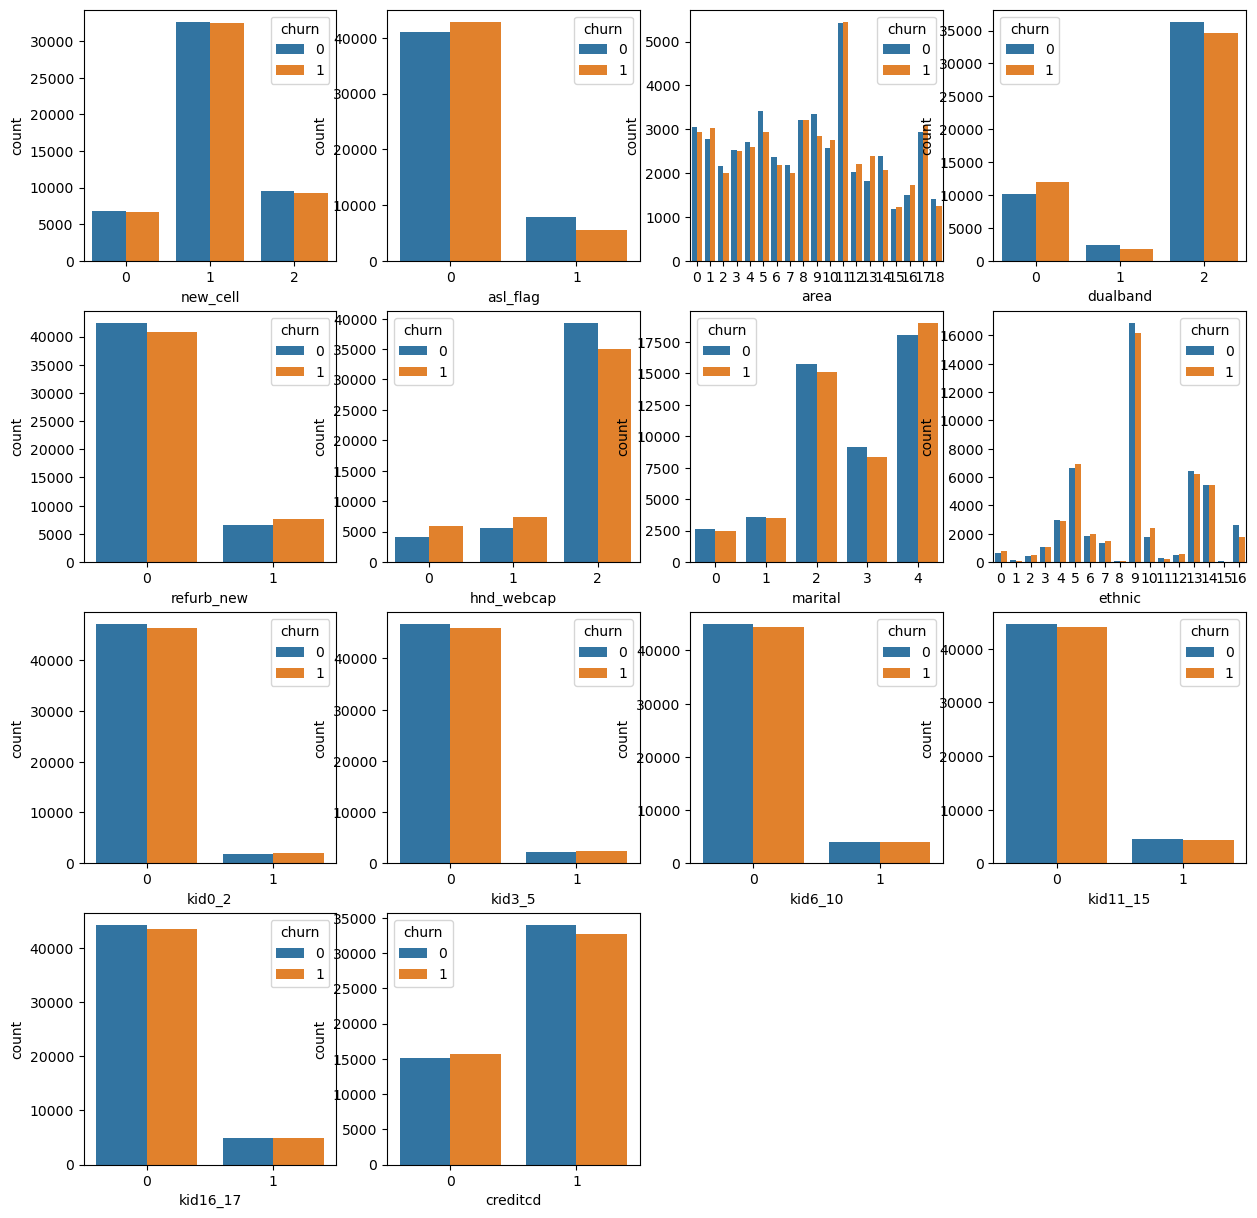

In [94]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_data):
    plt.subplot(4,4, i+1)
    sns.countplot(x=col, hue="churn", data=clean_data)
plt.show()

In [97]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97403 entries, 1000001 to 1100000
Data columns (total 88 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rev_Mean         97403 non-null  float64
 1   mou_Mean         97403 non-null  float64
 2   totmrc_Mean      97403 non-null  float64
 3   da_Mean          97403 non-null  float64
 4   ovrmou_Mean      97403 non-null  float64
 5   ovrrev_Mean      97403 non-null  float64
 6   vceovr_Mean      97403 non-null  float64
 7   datovr_Mean      97403 non-null  float64
 8   roam_Mean        97403 non-null  float64
 9   change_mou       97403 non-null  float64
 10  change_rev       97403 non-null  float64
 11  drop_vce_Mean    97403 non-null  float64
 12  drop_dat_Mean    97403 non-null  float64
 13  blck_vce_Mean    97403 non-null  float64
 14  blck_dat_Mean    97403 non-null  float64
 15  unan_vce_Mean    97403 non-null  float64
 16  unan_dat_Mean    97403 non-null  float64
 17  plcd

In [75]:
for column in categorical_data:
  unique_vals = clean_data[column].unique()
  print(f'Column: {column}')
  print(unique_vals)
  print(len(unique_vals))
  print('----------------------')

Column: new_cell
['U' 'Y' 'N']
3
----------------------
Column: asl_flag
['N' 'Y']
2
----------------------
Column: area
['NORTHWEST/ROCKY MOUNTAIN AREA' 'GREAT LAKES AREA' 'CHICAGO AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
19
----------------------
Column: dualband
['Y' 'N' 'T']
3
----------------------
Column: refurb_new
['N' 'R']
2
----------------------
Column: hnd_webcap
['WCMB' 'UNKW' 'WC']
3
----------------------
Column: marital
['S' 'M' 'A' 'U' 'B']
5
----------------------
Column: ethnic
['N' 'U' 'I' 'S' 'F' 'J' 'Z' 'M' 'H' 'G' 'D' 'O' 'R' 'B' 'P' 'X' 'C']
17
----------------------
Column: kid0_2
['U' 'Y']
2
----------------------
Column: kid3_5
['U' 'Y']
2
----------------------
Column: kid6_10
['U

**Label Encoding**

In [76]:
label_encode_cols = categorical_data

encoders = {}

for column in label_encode_cols:
    encoder = LabelEncoder()
    clean_data[column] = encoder.fit_transform(clean_data[column])
    encoders[column] = encoder

# dump(encoders, '/kaggle/working/encoders.joblib')

In [77]:
clean_data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.50,0.2475,0.0,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.0,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,13,2,0,149.98999,2.0,2.0,2,0.0,0.0,3,0.0,9,0,0,0,0,0,1,361.0
1000003,16.9900,10.25,16.99,0.0000,0.0,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.0,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,2,0,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,6,0,0,29.98999,2.0,1.0,0,0.0,0.0,2,0.0,9,0,1,0,0,0,1,1504.0
1000004,38.0000,7.50,38.00,0.0000,0.0,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.0,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,2,0,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,3,0,0,29.98999,1.0,1.0,0,0.0,0.0,2,0.0,14,1,0,0,0,0,1,1812.0
1000005,55.2300,570.50,71.98,0.0000,0.0,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.0,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,2,0,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,10,2,0,149.98999,6.0,4.0,2,0.0,0.0,3,0.0,6,0,0,0,0,0,1,434.0
1000006,82.2750,1312.25,75.00,1.2375,0.0,0.0,0.0,0.0,0.0,156.75,8.1450,52.000000,0.0,7.666667,0.0,76.000000,0.0,702.000000,0.0,365.000000,0.0,577.333333,0.0,4.333333,11.0,7.753333,301.666667,1.333333,369.536667,0.0,200.320000,370.333333,243.213333,147.000000,85.146667,555.666667,0.0,382.096667,0.0,303.666667,0.0,187.760000,0.0,59.666667,702.000000,577.333333,0.0,22.666667,0,59,2,2,2,0,26812,40869.00000,4033.98,3932.90,40295.00,26362,83.68,857.34,560.89,1260,960,80,1187.0,853.0,78.0,6,0,0,129.98999,9.0,4.0,2,0.0,0.0,3,0.0,14,0,0,0,0,0,1,458.0


[]

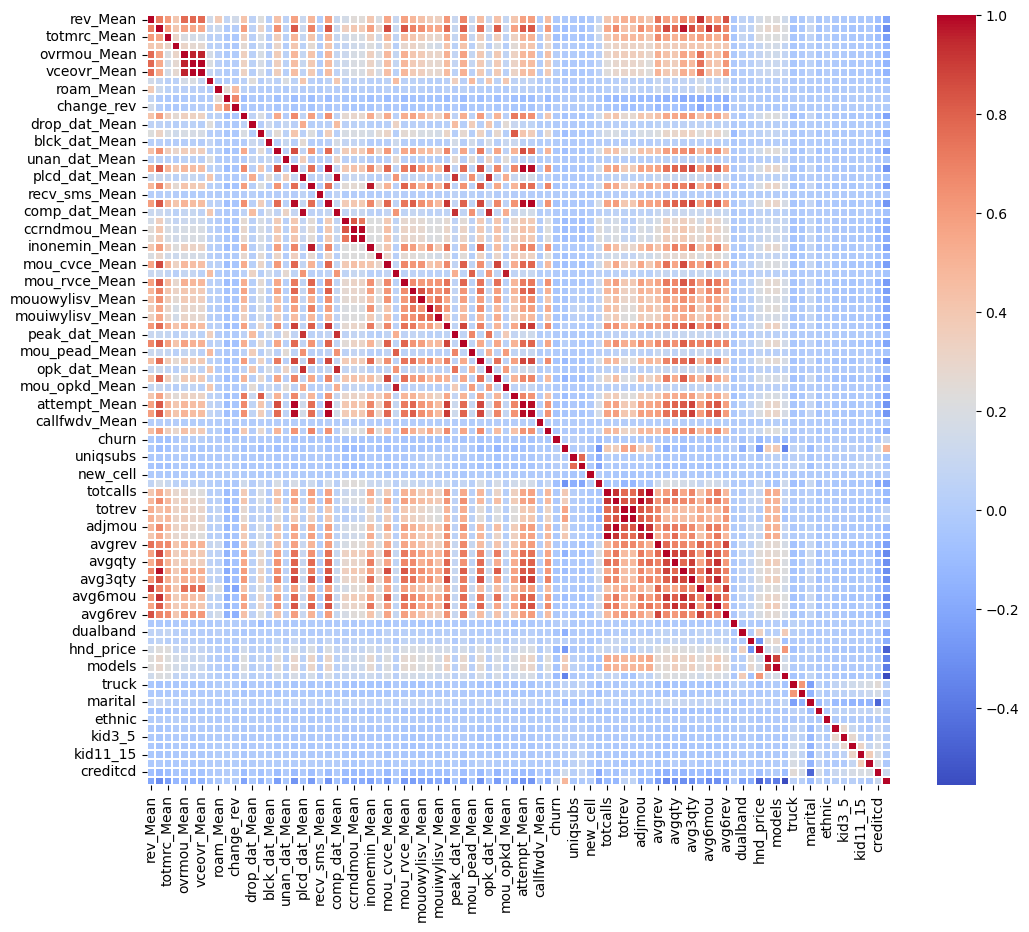

In [102]:
#Heatmap

plt.figure(figsize=(12, 10))
corr_matrix = clean_data.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1)

plt.plot()

**Removing Highly Corelated Data**

In [114]:
abs_corr_mat = corr_matrix.abs()

#Select upper traingle of correlation matrix
upper = abs_corr_mat.where(np.triu(np.ones(abs_corr_mat.shape), k=1).astype(bool))

#Features Having Correlation Greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print('Highly Corelated Features:')
print(to_drop, len(to_drop))

clean_data2 = clean_data.drop(to_drop, axis = 1)

Highly Corelated Features:
['ovrrev_Mean', 'vceovr_Mean', 'plcd_vce_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'mou_cvce_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'attempt_Mean', 'complete_Mean', 'totmou', 'adjrev', 'adjmou', 'adjqty', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'models'] 30


[]

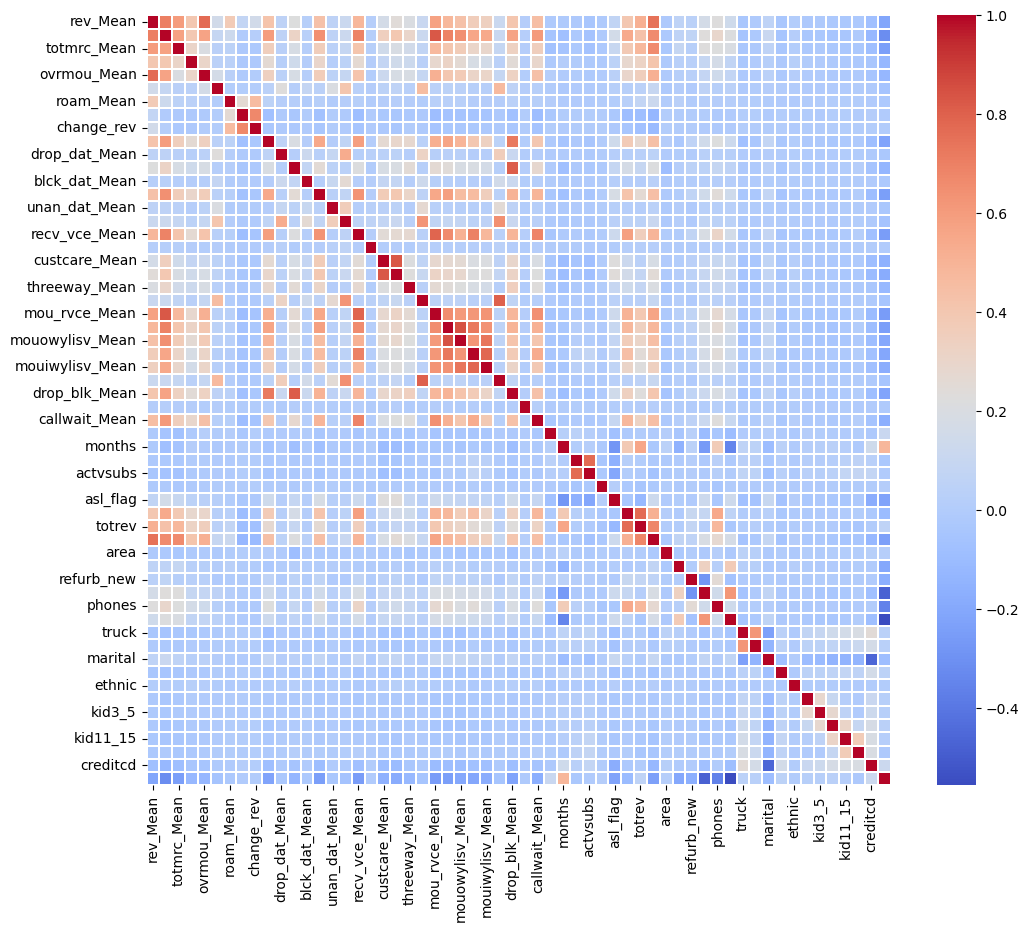

In [115]:
plt.figure(figsize=(12, 10))

corr_matrix2 = clean_data2.corr()
sns.heatmap(corr_matrix2, cmap='coolwarm', linewidths=0.1)
plt.plot()

In [117]:
clean_data2.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,custcare_Mean,ccrndmou_Mean,threeway_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,mou_pead_Mean,drop_blk_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totrev,avgrev,area,dualband,refurb_new,hnd_price,phones,hnd_webcap,truck,rv,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
count,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000,97403.000000
mean,58.462371,510.855475,46.055539,0.880515,40.723915,0.260225,1.274670,-14.327933,-1.035791,5.930180,0.040403,4.000602,0.021639,27.640220,0.029424,0.858037,54.747633,0.042422,1.783631,4.642824,0.282404,1.818861,110.930715,24.596292,28.284208,7.822240,18.060394,0.703570,9.992824,0.010886,1.760254,0.496925,18.844830,1.546369,1.356570,1.055573,0.137326,2865.896954,1029.534156,57.701297,8.470016,1.500067,0.145078,101.701745,1.780746,1.659764,0.188844,0.082523,2.762666,0.058006,9.112502,0.040851,0.047781,0.082082,0.089525,0.101270,0.684188,394.354835
std,45.978037,521.161669,23.456927,2.151959,96.543905,3.148476,14.819209,273.382270,50.242695,8.920630,0.886776,10.605836,0.723874,38.166730,0.496164,8.890823,86.378376,1.372099,5.325462,12.741792,1.082401,23.647473,161.774072,34.128519,48.670344,15.964164,41.252290,8.432704,15.262813,0.507977,5.282419,0.499993,9.625053,1.074919,0.648724,0.572554,0.344193,3768.641691,847.269159,35.900488,5.189653,0.840622,0.352181,60.961281,1.308659,0.656368,0.391387,0.275161,1.182920,0.233757,3.732901,0.197946,0.213303,0.274491,0.285501,0.301687,0.464841,255.562947
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,-3406.500000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.650000,0.480000,0.000000,0.000000,0.000000,9.989998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,33.250000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,-85.750000,-7.128750,0.666667,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.333333,0.000000,0.000000,0.000000,0.000000,0.000000,7.553333,3.000000,2.360000,0.000000,0.000000,0.000000,1.666667,0.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,0.000000,886.000000,519.525000,35.340000,4.000000,1.000000,0.000000,29.989990,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.000000
50%,48.147500,355.500000,44.990000,0.247500,3.000000,0.000000,0.000000,-7.250000,-0.322500,3.000000,0.000000,1.000000,0.000000,15.666667,0.000000,0.000000,26.333333,0.000000,0.000000,0.000000,0.000000,0.000000,49.816667,13.000000,11.906667,2.000000,3.173333,0.000000,5.333333,0.000000,0.333333,0.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1816.000000,804.400000,49.740000,9.000000,2.000000,0.000000,99.989990,1.000

**Splitting Data**

In [118]:
X = clean_data2.drop(['churn'], axis = 1)
y = clean_data2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

print('Training Data: ', X_train.shape, ', ' , y_train.shape)
print('Training Data: ', X_test.shape, ', ' , y_test.shape)

Training Data:  (68182, 57) ,  (68182,)
Training Data:  (29221, 57) ,  (29221,)


In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
evaluation_dict = {}

In [121]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred,average='macro')
lr_recall = recall_score(y_test, lr_pred,average='macro')
lr_f1_score = f1_score(y_test, lr_pred,average='macro')
evaluation_dict['Logistic Regression'] = [lr_precision, lr_recall, lr_f1_score, lr_accuracy]

In [159]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred,average='macro')
svc_recall = recall_score(y_test, svc_pred,average='macro')
svc_f1_score = f1_score(y_test, svc_pred,average='macro')
evaluation_dict['SVC'] = [svc_precision, svc_recall, svc_f1_score, svc_accuracy]

In [123]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='macro')
rf_recall = recall_score(y_test, rf_pred,average='macro')
rf_f1_score = f1_score(y_test, rf_pred,average='macro')
evaluation_dict['Random Forest'] = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]


In [124]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred,average='macro')
gb_recall = recall_score(y_test, gb_pred,average='macro')
gb_f1_score = f1_score(y_test, gb_pred,average='macro')
evaluation_dict['Gradient Boosting'] = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]


In [125]:
evaluation_dict

{'Logistic Regression': [0.5810184288593905,
  0.5810336073715079,
  0.5809756726497712,
  0.5809862769925739],
 'Random Forest': [0.61291851026825,
  0.6129244942035721,
  0.6128123218397266,
  0.6128127031929093],
 'Gradient Boosting': [0.6226173938344146,
  0.6220348672180416,
  0.6212075189093695,
  0.6215050819616029]}

In [160]:
df = pd.DataFrame.from_dict(evaluation_dict, orient='index', columns=['Precision', 'Recall', 'F1 Score','Accuracy'])

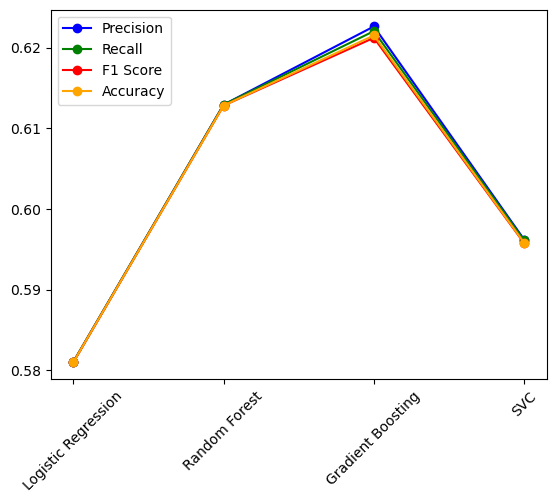

In [161]:
colors = ['blue', 'green', 'red', 'orange']
for i, matric in enumerate(df.columns):
    plt.plot(df[matric], marker='o', color=colors[i], label=matric)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [192]:
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf


model = Sequential()

model.add(Dense(units=256, activation='relu', input_dim=57))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:
# y_train_o = tf.one_hot(indices=y_train, depth=2)

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split = 0.2)

Epoch 1/10
546/546 [==============================] - 12s 19ms/step - loss: 0.6793 - accuracy: 0.5729 - val_loss: 0.6691 - val_accuracy: 0.5938
Epoch 2/10
546/546 [==============================] - 10s 19ms/step - loss: 0.6642 - accuracy: 0.5962 - val_loss: 0.6650 - val_accuracy: 0.5824
Epoch 3/10
546/546 [==============================] - 11s 19ms/step - loss: 0.6572 - accuracy: 0.6070 - val_loss: 0.6608 - val_accuracy: 0.5949
Epoch 4/10
546/546 [==============================] - 10s 19ms/step - loss: 0.6510 - accuracy: 0.6129 - val_loss: 0.6552 - val_accuracy: 0.6032
Epoch 5/10
546/546 [==============================] - 10s 18ms/step - loss: 0.6451 - accuracy: 0.6179 - val_loss: 0.6629 - val_accuracy: 0.6009
Epoch 6/10
546/546 [==============================] - 10s 18ms/step - loss: 0.6391 - accuracy: 0.6263 - val_loss: 0.6577 - val_accuracy: 0.6062
Epoch 7/10
546/546 [==============================] - 10s 19ms/step - loss: 0.6330 - accuracy: 0.6326 - val_loss: 0.6598 - val_accuracy:

In [194]:
model.evaluate(X_test, y_test)

914/914 [==============================] - 4s 4ms/step - loss: 0.6762 - accuracy: 0.6033


[0.6762343049049377, 0.6033332347869873]

In [ ]:
clean_data2.head()